<a href="https://colab.research.google.com/github/Gregcsr/Challenger-Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
print('Faturamento total por loja: ')
print('loja 1: ', loja['Preço'].sum())
print('loja 2: ',loja2['Preço'].sum())
print('loja 3: ',loja3['Preço'].sum())
print('loja 4: ',loja4['Preço'].sum())

Faturamento total por loja: 
loja 1:  1534509.12
loja 2:  1488459.06
loja 3:  1464025.03
loja 4:  1384497.58


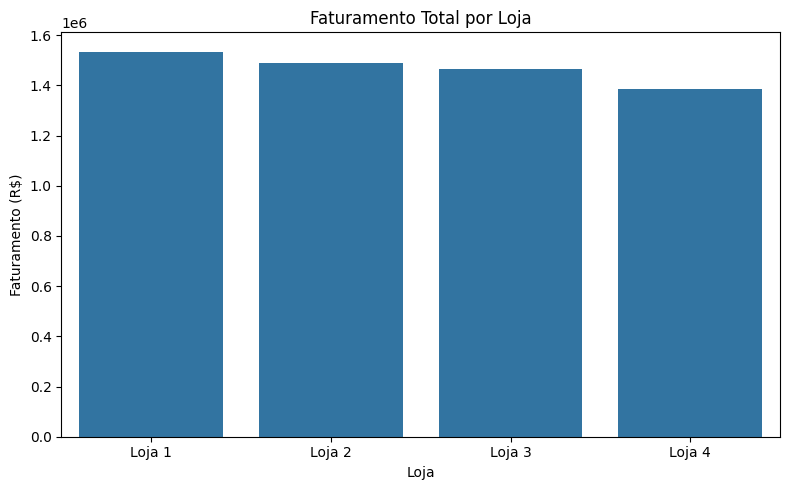

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

faturamento = {
    "Loja 1": loja["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(faturamento.keys()), y=list(faturamento.values()))
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [18]:

print("Quantidade por categoria - Loja 1:")
print(loja['Categoria do Produto'].value_counts())

print("\nQuantidade por categoria - Loja 2:")
print(loja2['Categoria do Produto'].value_counts())

print("\nQuantidade por categoria - Loja 3:")
print(loja3['Categoria do Produto'].value_counts())

print("\nQuantidade por categoria - Loja 4:")
print(loja4['Categoria do Produto'].value_counts())

Quantidade por categoria - Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Quantidade por categoria - Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Quantidade por categoria - Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Quantidade por categoria - Loja 4:
Categoria do Produto

# 3. Média de Avaliação das Lojas

In [20]:
print("Média das avaliações:")
print("Loja 1:", loja['Avaliação da compra'].mean())
print("Loja 2:", loja2['Avaliação da compra'].mean())
print("Loja 3:", loja3['Avaliação da compra'].mean())
print("Loja 4:", loja4['Avaliação da compra'].mean())

Média das avaliações:
Loja 1: 3.976685036032217
Loja 2: 4.037303942348453
Loja 3: 4.048325561678677
Loja 4: 3.9957591178965224


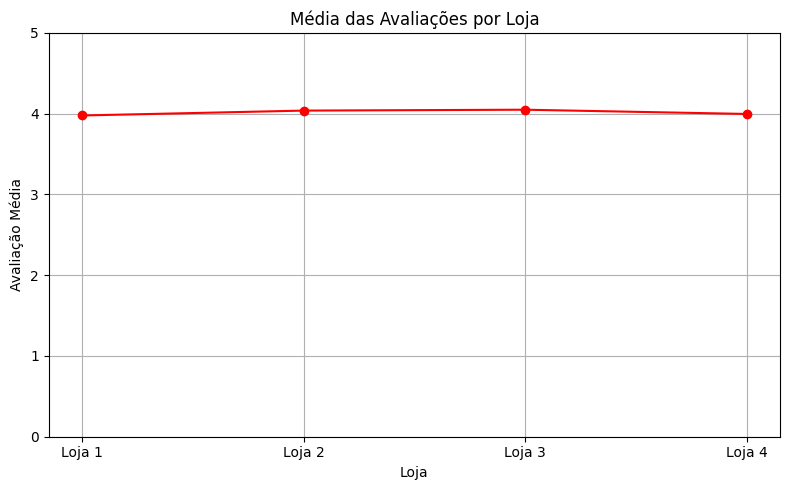

In [25]:
avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

plt.figure(figsize=(8, 5))
plt.plot(list(avaliacoes.keys()), list(avaliacoes.values()), marker='o', color='red')
plt.title("Média das Avaliações por Loja")
plt.ylabel("Avaliação Média")
plt.xlabel("Loja")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [27]:
def mais_menos_vendidos(df, nome_loja):
    contagem = df['Produto'].value_counts()
    print(f"{nome_loja} - Mais vendido:\n{contagem.head(1)}")
    print(f"{nome_loja} - Menos vendido:\n{contagem.tail(1)}\n")

mais_menos_vendidos(loja, "Loja 1")
mais_menos_vendidos(loja2, "Loja 2")
mais_menos_vendidos(loja3, "Loja 3")
mais_menos_vendidos(loja4, "Loja 4")

Loja 1 - Mais vendido:
Produto
Micro-ondas    60
Name: count, dtype: int64
Loja 1 - Menos vendido:
Produto
Celular ABXY    33
Name: count, dtype: int64

Loja 2 - Mais vendido:
Produto
Iniciando em programação    65
Name: count, dtype: int64
Loja 2 - Menos vendido:
Produto
Jogo de tabuleiro    32
Name: count, dtype: int64

Loja 3 - Mais vendido:
Produto
Kit banquetas    57
Name: count, dtype: int64
Loja 3 - Menos vendido:
Produto
Blocos de montar    35
Name: count, dtype: int64

Loja 4 - Mais vendido:
Produto
Cama box    62
Name: count, dtype: int64
Loja 4 - Menos vendido:
Produto
Guitarra    33
Name: count, dtype: int64



# 5. Frete Médio por Loja


In [36]:
print("Custo médio de frete:")
print("Loja 1:", loja['Frete'].mean())
print("Loja 2:", loja2['Frete'].mean())
print("Loja 3:", loja3['Frete'].mean())
print("Loja 4:", loja4['Frete'].mean())

Custo médio de frete:
Loja 1: 34.69180491551149
Loja 2: 33.62194065817927
Loja 3: 33.07446427411743
Loja 4: 31.278997081841727


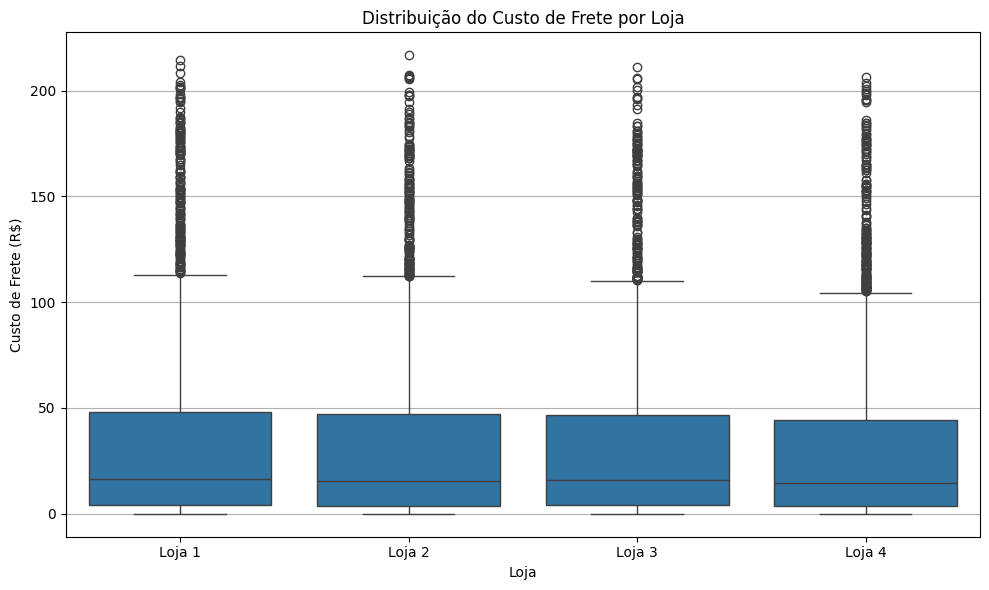

In [41]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

todas_lojas = pd.concat([loja, loja2, loja3, loja4])

plt.figure(figsize=(10, 6))
sns.boxplot(data=todas_lojas, x='Loja', y='Frete')
plt.title("Distribuição do Custo de Frete por Loja")
plt.ylabel("Custo de Frete (R$)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 6. Relatório

A recomendação é que o Senhor João venda a loja 4.
Isso se justifica atraves dos indicadores abaixo:

*   Menor Desempenho de Faturamento
*   Segunda pior avaliação dos clientes
*   Menor volume de vendas



